In [1]:
import os
from binance.client import Client
import pandas as pd
import datetime, time
import requests

import pandas as pd

In [2]:
import json

In [3]:
apikey = "FIdSUYaBPGon4KSWzOEUveHgMOV4Q6ZtsfWDdqbvdvOY9wrrOQ88ruXrur0CFhfr"
secret = "FM9qjI6DL4ZqtHXzESWeW7cRe1N3L6i6yzINSBQ0we9ELlslqA2ndG6zeT3lzLYX"

In [4]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

Authentication of the API

In [5]:
client = Client(apikey, secret)

In [6]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06193500'},
 {'symbol': 'LTCBTC', 'price': '0.00300500'},
 {'symbol': 'BNBBTC', 'price': '0.00772200'},
 {'symbol': 'NEOBTC', 'price': '0.00070500'},
 {'symbol': 'QTUMETH', 'price': '0.00326900'},
 {'symbol': 'EOSETH', 'price': '0.00116400'},
 {'symbol': 'SNTETH', 'price': '0.00002350'},
 {'symbol': 'BNTETH', 'price': '0.00107700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00014090'},
 {'symbol': 'BNBETH', 'price': '0.12460000'},
 {'symbol': 'BTCUSDT', 'price': '59560.28000000'},
 {'symbol': 'ETHUSDT', 'price': '3689.00000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001658'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
def GetHistoricalData(self, howLong):
    self.howLong = howLong
    # Calculate the timestamps for the binance api function
    self.untilThisDate = datetime.datetime.now()
    self.sinceThisDate = self.untilThisDate - datetime.timedelta(days = self.howLong)
    # Execute the query from binance - timestamps must be converted to strings !
    self.candle = self.client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, str(self.sinceThisDate), str(self.untilThisDate))

    # Create a dataframe to label all the columns returned by binance so we work with them later.
    self.df = pd.DataFrame(self.candle, columns=['dateTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol', 'takerBuyQuoteVol', 'ignore'])
    # as timestamp is returned in ms, let us convert this back to proper timestamps.
    self.df.dateTime = pd.to_datetime(self.df.dateTime, unit='ms').dt.strftime(Constants.DateTimeFormat)
    self.df.set_index('dateTime', inplace=True)

    # Get rid of columns we do not need
    self.df = self.df.drop(['closeTime', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol','takerBuyQuoteVol', 'ignore'], axis=1)

    print(self.df)

symbol (str) – Name of symbol pair e.g BNBBTC
interval (str) – Binance Kline interval
start_str (str|int) – Start date string in UTC format or timestamp in milliseconds
end_str (str|int) – optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
klines_type (HistoricalKlinesType) – Historical klines type: SPOT or FUTURES

In [9]:
a = client.get_historical_klines_generator(symbol="BTCUSD", interval="1D", start_str="01/01/2017", end_str="21/10/2021")

<generator object Client._historical_klines_generator at 0x0000029E66653A48>

In [11]:
def get_klines_iter(symbol, interval, start, end, limit=5000):
    df = pd.DataFrame()
    startDate = end
    while startDate>start:
        url = 'https://api.binance.com/api/v3/klines?symbol=' + \
            symbol + '&interval=' + interval + '&limit='  + str(iteration)
        if startDate is not None:
            url += '&endTime=' + str(startDate)
        
        df2 = pd.read_json(url)
        df2.columns = ['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quote asset volume', 'Number of trades','Taker by base', 'Taker buy quote', 'Ignore']
        df = pd.concat([df2, df], axis=0, ignore_index=True, keys=None)
        startDate = df.Opentime[0]   
    df.reset_index(drop=True, inplace=True)    
    return df 

<AxesSubplot:>

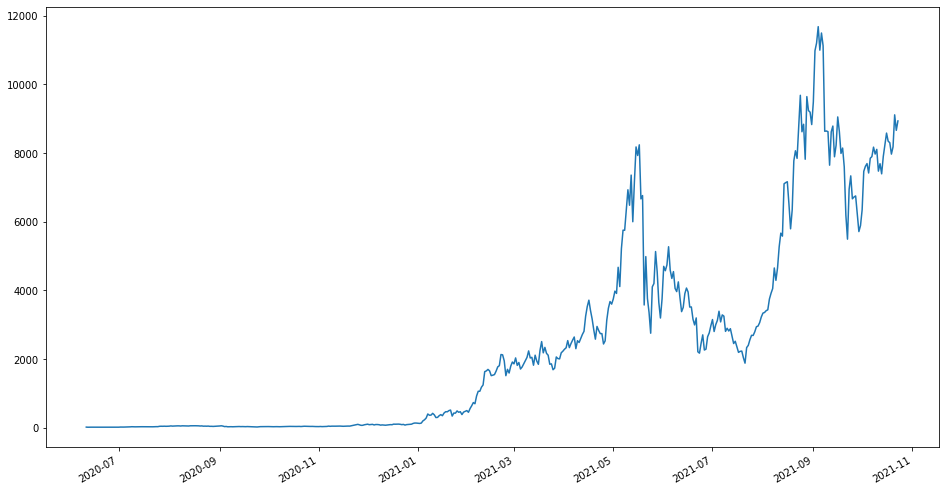

In [30]:
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere 
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
    
import datetime as dt  # for dealing with times

def get_bars(symbol, interval = '1d'):
   root_url = 'https://api.binance.com/api/v1/klines'
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

steemeth = get_bars('ADAUSDT')
ethusdt = get_bars('ETHUSDT')
steemusdt = steemeth['c'].astype('float') * ethusdt['c'].astype('float')

steemusdt.plot(figsize=(16,9))

In [18]:
steemeth

,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2021-10-22 04:12:59.999,1634868720000,0.00013910,0.00013910,0.00013910,0.00013910,0.00000000,1634868779999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 04:13:59.999,1634868780000,0.00013910,0.00013910,0.00013910,0.00013910,0.00000000,1634868839999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 04:14:59.999,1634868840000,0.00013910,0.00013910,0.00013910,0.00013910,0.00000000,1634868899999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 04:15:59.999,1634868900000,0.00013910,0.00013910,0.00013910,0.00013910,0.00000000,1634868959999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 04:16:59.999,1634868960000,0.00013910,0.00013910,0.00013910,0.00013910,0.00000000,1634869019999,0.00000000,0,0.00000000,0.00000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 12:27:59.999,1634898420000,0.00014250,0.00014250,0.00014250,0.00014250,0.00000000,1634898479999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 12:28:59.999,1634898480000,0.00014250,0.00014250,0.00014250,0.00014250,0.00000000,1634898539999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 12:29:59.999,1634898540000,0.00014250,0.00014250,0.00014250,0.00014250,0.00000000,1634898599999,0.00000000,0,0.00000000,0.00000000,0
2021-10-22 12:30:59.999,1634898600000,0.00014250,0.00014250,0.00014250,0.00014250,0.00000000,1634898659999,0.00000000,0,0.00000000,0.00000000,0


In [ ]:
get_klines_iter("BTCUSD","")

In [ ]:
GetHistoricalData()

In [10]:
print(tickers[0])

{'symbol': 'ETHBTC', 'price': '0.06193500'}


In [11]:
tickers_df = pd.DataFrame(tickers)

In [12]:
tickers_df.head()

,symbol,price
0,ETHBTC,0.06193500
1,LTCBTC,0.00300500
2,BNBBTC,0.00772200
3,NEOBTC,0.00070500
4,QTUMETH,0.00326900


In [ ]:
client.get_asset_balance

In [13]:
tickers_df.set_index('symbol', inplace=True)

In [16]:
depth = client.get_order_book(symbol='ADAUSDT')
depth

{'lastUpdateId': 4572261404,
 'bids': [['2.11600000', '62021.30000000'],
  ['2.11500000', '66459.10000000'],
  ['2.11400000', '29538.60000000'],
  ['2.11300000', '53568.10000000'],
  ['2.11200000', '41232.10000000'],
  ['2.11100000', '30063.20000000'],
  ['2.11000000', '84783.20000000'],
  ['2.10900000', '62762.50000000'],
  ['2.10800000', '79681.30000000'],
  ['2.10700000', '36746.00000000'],
  ['2.10600000', '112013.30000000'],
  ['2.10500000', '72395.90000000'],
  ['2.10400000', '60807.10000000'],
  ['2.10300000', '6800.10000000'],
  ['2.10200000', '37840.40000000'],
  ['2.10100000', '7742.10000000'],
  ['2.10000000', '37250.50000000'],
  ['2.09900000', '23333.70000000'],
  ['2.09800000', '19760.60000000'],
  ['2.09700000', '1967.30000000'],
  ['2.09600000', '3912.60000000'],
  ['2.09500000', '5378.30000000'],
  ['2.09400000', '69609.70000000'],
  ['2.09300000', '6321.30000000'],
  ['2.09200000', '9841.80000000'],
  ['2.09100000', '8673.40000000'],
  ['2.09000000', '41278.80000000']

In [23]:
depth = client.get_order_book(symbol="ADAUSDT")

In [24]:
depth_df = pd.DataFrame(depth["bids"])
depth_df.columns = ["Price", "Volume"]

In [26]:
depth_df.head()

,Price,Volume
0,2.10700000,31298.20000000
1,2.10600000,26911.90000000
2,2.10500000,68745.10000000
3,2.10400000,38711.70000000
4,2.10300000,49812.20000000


In [28]:
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_1MONTH, "1 year UTC")


In [ ]:
klines_df = pd.DataFrame(klines["bids"])
kline_df.columns = ["Price", "Volume"]

In [14]:
tickers_df.loc["ADAEUR"]
client.get_universal_transfer_history

price    1.81700000
Name: ADAEUR, dtype: object

In [90]:
klines = client.get_historical_klines("ADAEUR", Client.KLINE_INTERVAL_3DAY, "1 Dec, 2020", "5 Dec, 2020")
klines
klines_df = pd.DataFrame(klines)

In [91]:
klines

[[1606780800000,
  '0.14368000',
  '0.14591000',
  '0.12000000',
  '0.13567000',
  '17959959.20000000',
  1607039999999,
  '2392750.56821900',
  10461,
  '8859899.80000000',
  '1182153.56026100',
  '0'],
 [1607040000000,
  '0.13523000',
  '0.13572000',
  '0.12100000',
  '0.13099000',
  '8862706.80000000',
  1607299199999,
  '1146880.92235600',
  4778,
  '4430069.50000000',
  '573079.55603000',
  '0']]

In [94]:
for elem in klines_df:
    elem = pd.to_numeric(klines_df[0], downcast="float")

0   1,606,780,846,080.00
1   1,607,039,975,424.00
Name: 0, dtype: float32

In [95]:
klines_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,"1,606,780,846,080.00",0.14368000,0.14591000,0.12000000,0.13567000,17959959.20000000,1607039999999,2392750.56821900,10461,8859899.80000000,1182153.56026100,0
1,"1,607,039,975,424.00",0.13523000,0.13572000,0.12100000,0.13099000,8862706.80000000,1607299199999,1146880.92235600,4778,4430069.50000000,573079.55603000,0


In [83]:

pd.options.display.float_format = "{:,.2f}".format


In [84]:
klines_df[1]

0   0.14
Name: 1, dtype: float32

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt

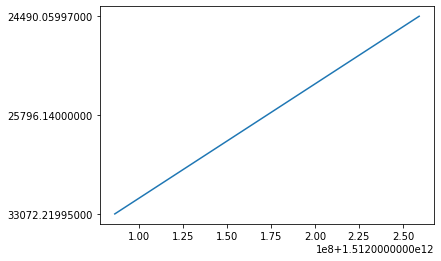

In [69]:
plt.plot(klines_df[0], klines_df[5])

In [31]:
float(tickers_df.loc["ADAUSDT"]["price"])

2.16

In [33]:
depth = client.get_order_book(symbol="ADAUSDT")
depth

{'lastUpdateId': 4544832358,
 'bids': [['2.15700000', '44109.60000000'],
  ['2.15600000', '110614.70000000'],
  ['2.15500000', '52020.20000000'],
  ['2.15400000', '89821.20000000'],
  ['2.15300000', '46372.10000000'],
  ['2.15200000', '50244.30000000'],
  ['2.15100000', '174788.80000000'],
  ['2.15000000', '73763.70000000'],
  ['2.14900000', '76377.20000000'],
  ['2.14800000', '86798.80000000'],
  ['2.14700000', '49371.60000000'],
  ['2.14600000', '43056.00000000'],
  ['2.14500000', '45489.90000000'],
  ['2.14400000', '102767.90000000'],
  ['2.14300000', '13757.20000000'],
  ['2.14200000', '81156.60000000'],
  ['2.14100000', '4589.80000000'],
  ['2.14000000', '20423.90000000'],
  ['2.13900000', '11872.30000000'],
  ['2.13800000', '14482.40000000'],
  ['2.13700000', '1078.30000000'],
  ['2.13600000', '73090.50000000'],
  ['2.13500000', '241243.90000000'],
  ['2.13400000', '8211.00000000'],
  ['2.13300000', '471859.90000000'],
  ['2.13200000', '14865.10000000'],
  ['2.13100000', '24260.5

In [35]:
depth_df = pd.DataFrame(depth["bids"])
depth_df

,0,1
0,2.15700000,44109.60000000
1,2.15600000,110614.70000000
2,2.15500000,52020.20000000
3,2.15400000,89821.20000000
4,2.15300000,46372.10000000
...,...,...
95,2.06200000,5871.90000000
96,2.06100000,19703.00000000
97,2.06000000,95943.80000000
98,2.05900000,6321.30000000


In [1]:
import seaborn as sns


In [ ]:
df_sns = sns.load_dataset('iris')

# Plot the histogram thanks to the distplot function
sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False )